# Playground notebook on using keras for time series


In [4]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
m = 2
b = 3
x = np.linspace(0,50,100)

In [7]:
np.random.seed(101)
noise = np.random.normal(loc=0,scale=4,size=len(x))

## y = mx + b + noise

In [8]:
y = m*x + b + noise

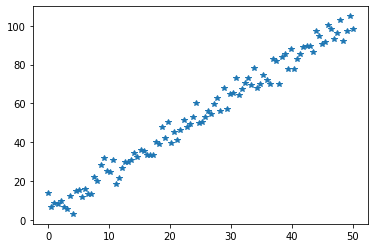

In [9]:
plt.plot(x,y,'*')

## objective - create a model that perform a regression

In [10]:
from keras.models import Sequential

In [11]:
from keras.layers import Dense

In [12]:
model = Sequential()

# adding layers of neurons (dense)
model.add(Dense(4,input_dim=1,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(loss='mse',optimizer='adam')

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [14]:
# just a regression problem - no split train and test
model.fit(x,y,epochs=200)

Epoch 1/200
100/100 [==============================] - 0s 3ms/step - loss: 3628.6189
Epoch 2/200
100/100 [==============================] - 0s 70us/step - loss: 3621.3017
Epoch 3/200
100/100 [==============================] - 0s 81us/step - loss: 3613.3127
Epoch 4/200
100/100 [==============================] - 0s 90us/step - loss: 3605.1696
Epoch 5/200
100/100 [==============================] - 0s 72us/step - loss: 3597.2314
Epoch 6/200
100/100 [==============================] - 0s 94us/step - loss: 3588.3252
Epoch 7/200
100/100 [==============================] - 0s 89us/step - loss: 3579.4410
Epoch 8/200
100/100 [==============================] - 0s 117us/step - loss: 3570.6220
Epoch 9/200
100/100 [==============================] - 0s 101us/step - loss: 3561.4552
Epoch 10/200
100/100 [==============================] - 0s 126us/step - loss: 3551.7839
Epoch 11/200
100/100 [==============================] - 0s 100us/step - loss: 3542.2298
Epoch 12/200
100/100 [===========================

100/100 [==============================] - 0s 92us/step - loss: 30.5886
Epoch 189/200
100/100 [==============================] - 0s 81us/step - loss: 29.6289
Epoch 190/200
100/100 [==============================] - 0s 94us/step - loss: 28.6914
Epoch 191/200
100/100 [==============================] - 0s 86us/step - loss: 27.8472
Epoch 192/200
100/100 [==============================] - 0s 79us/step - loss: 27.0470
Epoch 193/200
100/100 [==============================] - 0s 95us/step - loss: 26.2280
Epoch 194/200
100/100 [==============================] - 0s 94us/step - loss: 25.4813
Epoch 195/200
100/100 [==============================] - 0s 93us/step - loss: 24.7961
Epoch 196/200
100/100 [==============================] - 0s 112us/step - loss: 24.1965
Epoch 197/200
100/100 [==============================] - 0s 78us/step - loss: 23.6534
Epoch 198/200
100/100 [==============================] - 0s 105us/step - loss: 23.1463
Epoch 199/200
100/100 [==============================] - 0s 111us/

as long as the loss decreases, epochs can be increased

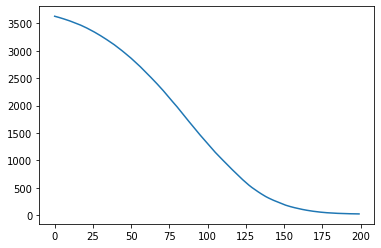

In [18]:
loss = model.history.history['loss']
epochs = range(len(loss))
plt.plot(epochs,loss)

In [19]:
# continue to train where the model was left off (epochs = 200)
model.fit(x,y,epochs=20)

Epoch 1/20
100/100 [==============================] - 0s 117us/step - loss: 21.9521
Epoch 2/20
100/100 [==============================] - 0s 88us/step - loss: 21.5795
Epoch 3/20
100/100 [==============================] - 0s 94us/step - loss: 21.2511
Epoch 4/20
100/100 [==============================] - 0s 82us/step - loss: 20.9199
Epoch 5/20
100/100 [==============================] - 0s 94us/step - loss: 20.6921
Epoch 6/20
100/100 [==============================] - 0s 86us/step - loss: 20.4478
Epoch 7/20
100/100 [==============================] - 0s 103us/step - loss: 20.2610
Epoch 8/20
100/100 [==============================] - 0s 99us/step - loss: 20.0873
Epoch 9/20
100/100 [==============================] - 0s 89us/step - loss: 19.9355
Epoch 10/20
100/100 [==============================] - 0s 86us/step - loss: 19.7743
Epoch 11/20
100/100 [==============================] - 0s 106us/step - loss: 19.6290
Epoch 12/20
100/100 [==============================] - 0s 111us/step - loss: 19.51

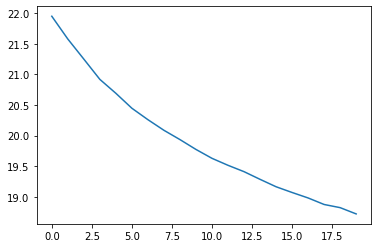

In [20]:
loss = model.history.history['loss']
epochs = range(len(loss))
plt.plot(epochs,loss)

In [22]:
# use the model for prediction
x_for_prediction = np.linspace(0,50,100)

y_pred = model.predict(x_for_prediction)

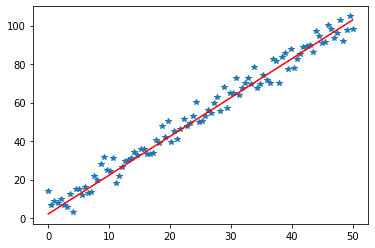

In [23]:
plt.plot(x,y,'*')
plt.plot(x_for_prediction,y_pred,'r')

In [25]:
# measure metrics for the model 
from sklearn.metrics import mean_squared_error

In [26]:
mean_squared_error(y,y_pred)

18.70045656957424